# House Price Prediction using Multiple Linear Regression

We will implement linear regression with multiple variables to
predict the prices of houses. Suppose you are selling your house and you
want to know what a good market price would be. One way to do this is to
first collect information on recent houses sold and make a model of housing
prices.

The file ex1data2.txt contains a training set of housing prices in Port-
land, Oregon. The first column is the size of the house (in square feet), the
second column is the number of bedrooms, and the third column is the price
of the house.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving ex1data2.txt to ex1data2.txt


In [ ]:
import pandas as pd
df = pd.read_csv('ex1data2.txt', sep = ',', header=None, names=['Size','Bedrooms','Price'])
df.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [ ]:
df.describe()

,Size,Bedrooms,Price
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


In [ ]:
# Convert the pandas dataframe to numpy array

import numpy as np
data = df.values

'''
x (ndarray) - (m,n) : matrix of m examples with n features
y (ndarray) - (m,1) : target values
'''

x = np.array(data[:,:2])
y = np.array(data[:,2]).reshape(np.size(x,0),1)
m = len(y)

# print(x.shape)
# print(y.shape)

In [ ]:
# Initializing the fitting parameters
import copy
'''
w (ndarray) - (n,1)    : prediction parameter
b (scalar)             : prediction parameter
iters                  : number of iterations
alpha                  : learning rate
'''
w_int = np.zeros((np.size(x,1),1))
b_int = 0
iters = 400
alpha = 0.1

In [ ]:
# Normalizing the features
def Normalize_feature(x):
  '''
  mu    - (1,n) : Mean 
  sigma - (1,n) : Standard Deviation
  '''
  
  m,n = x.shape
  mu = np.zeros((1,n))
  sigma = np.zeros((1, n))
  x_norm = np.zeros_like(x, dtype=np.float32)
  X = copy.deepcopy(x)

  for i in range(n):
    mu[0, i] = np.mean(X[:,i])
    sigma[0, i] = np.std(X[:,i])

  for j in range(n):
    for i in range(m):
      x_norm[i][j] = (X[i,j]*1.0 - mu[0,j])/sigma[0,j]

  return x_norm, mu, sigma

x_norm, mu, sigma = Normalize_feature(x)
print(mu)
print(sigma)
# print(x_norm)

[[2000.68085106    3.17021277]]
[[7.86202619e+02 7.52842809e-01]]


In [ ]:
# Compute cost function
def Compute_cost(x, y, w, b):
  '''
   J (scalar): cost 
  '''
  w = copy.deepcopy(w)
  J = 0
  J = ((np.dot(x,w) + b) - y)**2/(2*m)
  J = np.sum(J)
  return J

Compute_cost(x_norm, y, w, b)

65591548106.45744

In [ ]:
# Compute gradient
def Compute_Gradient(x, y, w, b):
  '''
  dw (ndarray) : Gradient of the cost w.r.t parameter w
  db (scalar) : Gradient of the cost w.r.t parameter b 
  '''
  w = copy.deepcopy(w)
  m,n = x.shape
  d_w = np.zeros((n,1))
  d_b = 0

  err = np.dot(x,w) + b - y
  for j in range(n):
    d_w[j,0] = np.sum(np.multiply(err,x[:,j].reshape(m,1)))/m
  d_b = np.sum(err)/m
  
  return d_w, d_b

In [ ]:
# Compute gradient descent
def Gradient_Descent(x, y, w, b, alpha, iters): 
    J_hist = [] 
    m,n = x.shape
    
    for i in range(iters):  
      d_w, d_b = Compute_Gradient(x,y,w,b)   
      w = w - alpha * d_w    
      b = b - alpha * d_b    
      J_hist.append(Compute_cost(x, y, w, b))

    return w, b, J_hist

w, b, J_hist = Gradient_Descent(x_norm, y, w_int, b_int, 0.1, iters)

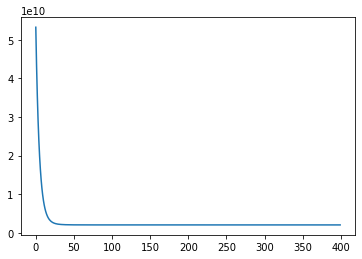

In [ ]:
# Plotting the Convergence graph
import matplotlib.pyplot as plt

plt.figure()
plt.plot(range(iters), J_hist)

In [ ]:
print(w,b)

[[109447.79355824]
 [ -6578.35335554]] 340412.65937225375


In [ ]:
def normalize(p, mu, sigma):
  n = len(p)
  p_norm = np.zeros_like(p,dtype=np.float32)

  for i in range(n):
    p_norm[i]=(p[i] - mu[0,i])/sigma[0,i]

  return p_norm

# normalize(p, mu, sigma)

In [ ]:
# Model Prediction
def predict(p, mu, sigma, w = w, b = b):
  p_norm = normalize(p, mu, sigma)
  pred = np.dot(p_norm,w)+b
  return pred

p = np.array([1650, 3])
predict(p, mu, sigma)

array([293081.46632769])

In [ ]:
# Normal Equation

def Normal_Eqn(x,y):
  X = copy.deepcopy(x)
  o = np.ones((np.size(X,0),1))
  X = np.concatenate((o,X), axis=1)

  Xt = np.transpose(X)
  a = np.linalg.inv(np.dot(Xt,X))
  c = np.dot(a,Xt)
  para = np.dot(c,y)
  p = np.array([1, 1650, 3]) 
  pred = np.dot(p,para)

  return para, pred

para, pred = Normal_Eqn(x,y)
print(pred)

[293081.4643349]
